In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2346/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1481, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649
2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829
2025-12-19,1565.099976,1574.199951,1551.000000,1554.400024,13937275


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...


Fetching news for month: 2025-12...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 6303


,date,title,source
0,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
1,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
2,"Thu, 02 Jan 2020 08:00:00 GMT",Mukesh Ambani: Asia's richest man takes on ret...,"{'href': 'https://www.bbc.com', 'title': 'BBC'}"
3,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
4,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done
Solving environment: \ 

| 

done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.1              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.3               |     pyhd8ed1ab_0         221 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-

openssl-3.6.0        | 3.0 MB    |                                       |   0% 
conda-25.11.1        | 1.2 MB    |                                       |   0% 

nltk-3.9.2           | 1.1 MB    |                                       |   0% 


regex-2025.11.3      | 402 KB    |                                       |   0% 



joblib-1.5.3         | 221 KB    |                                       |   0% 




certifi-2025.11.12   | 153 KB    |                                       |   0% 





ca-certificates-2025 | 149 KB    |                                       |   0% 

openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 


regex-2025.11.3      | 402 KB    | #4                                    |   4% 

nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 


conda-25.11.1        | 1.2 MB    | 4                                     |   1% 



joblib-1.5.3         | 221 KB    | ##6                                   |   7% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 





joblib-1.5.3         | 221 KB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 
openssl-3.6.0        | 3.0 MB    | ################4                     |  45% 






certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 




regex-2025.11.3      | 402 KB    | ##################################### | 100% 


openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 





joblib-1.5.3         | 221 KB    | ##################################### | 100% 



joblib-1.5.3         | 221 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 
conda-25.11.1        | 1.2 MB    | ##################################### | 100% 

                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: - 

done
Verifying transaction: | 

/ 

- 

done
Executing transaction: | 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...


[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
1,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
2,Mukesh Ambani: Asia's richest man takes on ret...,mukesh ambani asia richest man take retail gia...
3,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
4,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-12-22 03:23:44.382414: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/22/2025 03:23:46 AM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


12/22/2025 03:23:46 AM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.



Starting sentiment analysis with FinBERT. This will take a very long time...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/6303 headlines...


  Processed 128/6303 headlines...


  Processed 192/6303 headlines...


  Processed 256/6303 headlines...


  Processed 320/6303 headlines...


  Processed 384/6303 headlines...


  Processed 448/6303 headlines...


  Processed 512/6303 headlines...


  Processed 576/6303 headlines...


  Processed 640/6303 headlines...


  Processed 704/6303 headlines...


  Processed 768/6303 headlines...


  Processed 832/6303 headlines...


  Processed 896/6303 headlines...


  Processed 960/6303 headlines...


  Processed 1024/6303 headlines...


  Processed 1088/6303 headlines...


  Processed 1152/6303 headlines...


  Processed 1216/6303 headlines...


  Processed 1280/6303 headlines...


  Processed 1344/6303 headlines...


  Processed 1408/6303 headlines...


  Processed 1472/6303 headlines...


  Processed 1536/6303 headlines...


  Processed 1600/6303 headlines...


  Processed 1664/6303 headlines...


  Processed 1728/6303 headlines...


  Processed 1792/6303 headlines...


  Processed 1856/6303 headlines...


  Processed 1920/6303 headlines...


  Processed 1984/6303 headlines...


  Processed 2048/6303 headlines...


  Processed 2112/6303 headlines...


  Processed 2176/6303 headlines...


  Processed 2240/6303 headlines...


  Processed 2304/6303 headlines...


  Processed 2368/6303 headlines...


  Processed 2432/6303 headlines...


  Processed 2496/6303 headlines...


  Processed 2560/6303 headlines...


  Processed 2624/6303 headlines...


  Processed 2688/6303 headlines...


  Processed 2752/6303 headlines...


  Processed 2816/6303 headlines...


  Processed 2880/6303 headlines...


  Processed 2944/6303 headlines...


  Processed 3008/6303 headlines...


  Processed 3072/6303 headlines...


  Processed 3136/6303 headlines...


  Processed 3200/6303 headlines...


  Processed 3264/6303 headlines...


  Processed 3328/6303 headlines...


  Processed 3392/6303 headlines...


  Processed 3456/6303 headlines...


  Processed 3520/6303 headlines...


  Processed 3584/6303 headlines...


  Processed 3648/6303 headlines...


  Processed 3712/6303 headlines...


  Processed 3776/6303 headlines...


  Processed 3840/6303 headlines...


  Processed 3904/6303 headlines...


  Processed 3968/6303 headlines...


  Processed 4032/6303 headlines...


  Processed 4096/6303 headlines...


  Processed 4160/6303 headlines...


  Processed 4224/6303 headlines...


  Processed 4288/6303 headlines...


  Processed 4352/6303 headlines...


  Processed 4416/6303 headlines...


  Processed 4480/6303 headlines...


  Processed 4544/6303 headlines...


  Processed 4608/6303 headlines...


  Processed 4672/6303 headlines...


  Processed 4736/6303 headlines...


  Processed 4800/6303 headlines...


  Processed 4864/6303 headlines...


  Processed 4928/6303 headlines...


  Processed 4992/6303 headlines...


  Processed 5056/6303 headlines...


  Processed 5120/6303 headlines...


  Processed 5184/6303 headlines...


  Processed 5248/6303 headlines...


  Processed 5312/6303 headlines...


  Processed 5376/6303 headlines...


  Processed 5440/6303 headlines...


  Processed 5504/6303 headlines...


  Processed 5568/6303 headlines...


  Processed 5632/6303 headlines...


  Processed 5696/6303 headlines...


  Processed 5760/6303 headlines...


  Processed 5824/6303 headlines...


  Processed 5888/6303 headlines...


  Processed 5952/6303 headlines...


  Processed 6016/6303 headlines...


  Processed 6080/6303 headlines...


  Processed 6144/6303 headlines...


  Processed 6208/6303 headlines...


  Processed 6272/6303 headlines...


  Processed 6303/6303 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,year reliance becomes india digital champion v...,neutral
1,reliance industry starting roll new ecommerce ...,neutral
2,mukesh ambani asia richest man take retail gia...,neutral
3,mukesh ambanis reliance industry india answer ...,neutral
4,reliance industry post record q profit r crore...,positive


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2346/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2346/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501587,719.791212,682.839822,719.791212,32545850,685.892966,54.332528,-0.2
2020-01-21,686.194946,691.540813,680.871417,683.823983,18922720,686.669447,54.600534,0.0
2020-01-22,685.948914,691.943454,684.942368,690.713238,10322817,686.607138,49.591977,0.0
2020-01-23,683.041138,689.796156,680.289905,687.358062,11247739,686.278015,47.885889,1.0
2020-01-24,680.670105,687.290921,679.328024,683.108140,14628445,686.918688,54.701035,1.0


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1463,2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1549.657148,56.812546,-0.5
1464,2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1547.685721,36.832064,-0.5
1465,2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1546.328578,40.537839,-0.5
1466,2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829,1544.678580,38.006234,-0.5
1467,2025-12-19,1565.099976,1574.199951,1551.000000,1554.400024,13937275,1544.607152,49.567474,-0.5


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.4
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.5
2020-01-22,0.243342,0.072348,0.207570,0.466040,0.5
2020-01-23,0.240906,0.078830,0.207274,0.447050,1.0
2020-01-24,0.238920,0.102524,0.207850,0.522908,1.0


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1408, 60, 5)
Shape of y_data: (1408,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1126, 60, 5)
y_train shape: (1126,)
X_test shape: (282, 60, 5)
y_test shape: (282,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-12-22 03:26:53.440030: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 996.02 INR
R-squared (R²) Score: -83.57


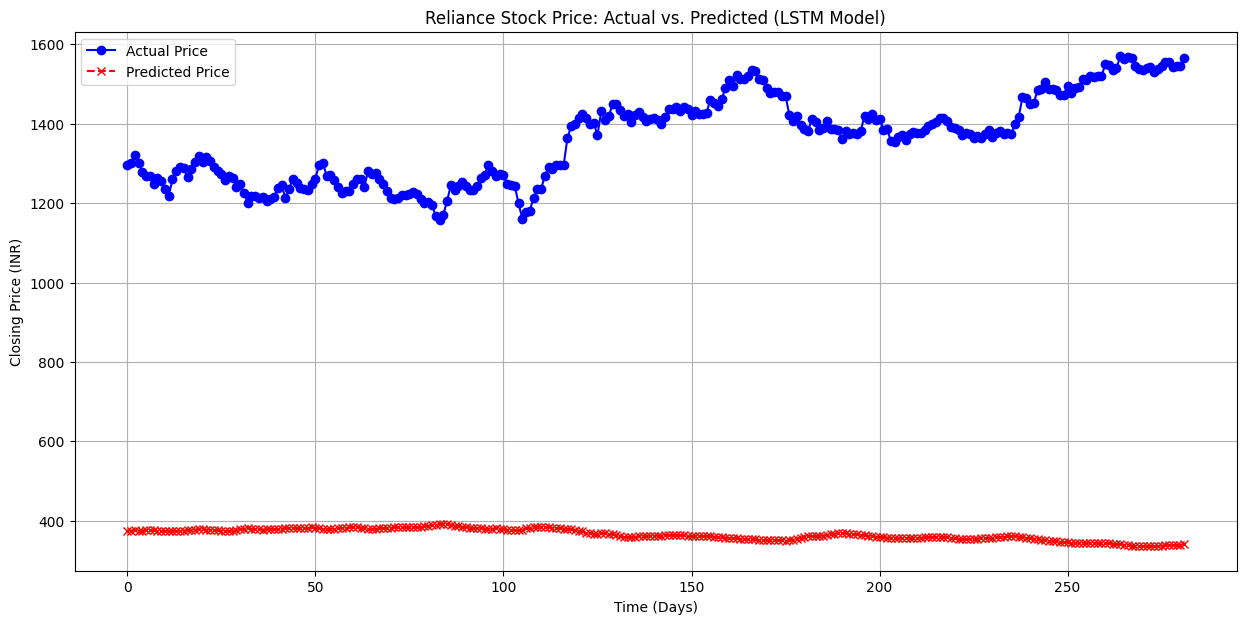

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.4789

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3402

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2676

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2264

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1983

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1773

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1613

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1485

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1380

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1291

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1216

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1150

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1094 - val_loss: 0.0102


Epoch 2/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0082

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0091

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0091

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0089

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0086

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0086

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0085

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0085

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - val_loss: 0.0022


Epoch 3/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0068

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0062

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0058 - val_loss: 0.0020


Epoch 4/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0071

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0065

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0063

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0061

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - val_loss: 0.0025


Epoch 5/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0059

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0065

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0063

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0063

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0062

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0061

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0060

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - val_loss: 0.0031


Epoch 6/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0076

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0061

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0055

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0053

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0053

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0050 - val_loss: 0.0014


Epoch 7/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0043 - val_loss: 0.0013


Epoch 8/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0041

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038 - val_loss: 0.0014


Epoch 9/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0039

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038 - val_loss: 0.0016


Epoch 10/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038 - val_loss: 0.0012


Epoch 11/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0048

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0049

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0040 - val_loss: 0.0032


Epoch 12/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0036

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0036 - val_loss: 0.0013


Epoch 13/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0019

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0018


Epoch 14/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 0.0013


Epoch 15/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0031

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 0.0012


Epoch 16/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - val_loss: 0.0021


Epoch 17/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0038

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 8.4367e-04


Epoch 18/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0031

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 9.4240e-04


Epoch 19/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0032

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 0.0011


Epoch 20/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0036

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 9.2813e-04


Epoch 21/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0038

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 0.0014


Epoch 22/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 8.4946e-04


Epoch 23/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0017

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - val_loss: 9.4582e-04


Epoch 24/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0042

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 0.0012


Epoch 25/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0033

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 0.0032


Epoch 26/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0056

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 8.9817e-04


Epoch 27/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - val_loss: 0.0032


Epoch 28/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 0.0011


Epoch 29/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0029 - val_loss: 8.6530e-04


Epoch 30/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 7.6642e-04


Epoch 31/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0018

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 8.9337e-04


Epoch 32/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0027

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 7.6550e-04


Epoch 33/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0033

 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 5/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 6.8047e-04


Epoch 34/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 6.7451e-04


Epoch 35/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0028

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 0.0011


Epoch 36/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0015

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0036


Epoch 37/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0042

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0029 - val_loss: 9.9822e-04


Epoch 38/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - val_loss: 7.5111e-04


Epoch 39/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027 - val_loss: 7.7933e-04


Epoch 40/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - val_loss: 9.9407e-04


Epoch 41/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0015


Epoch 42/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0012

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0026 - val_loss: 0.0013


Epoch 43/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0039

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0010


Epoch 44/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0051

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025 - val_loss: 6.8273e-04


Epoch 45/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0023 - val_loss: 7.0265e-04


Epoch 46/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0020

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 6.3276e-04


Epoch 47/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0019 - val_loss: 6.5098e-04


Epoch 48/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 8.0076e-04


Epoch 49/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0017

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0023 - val_loss: 6.2144e-04


Epoch 50/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0016

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020 - val_loss: 6.2028e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

12/22/2025 03:27:45 AM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
